In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\BMW sales data.csv")

In [4]:
df.head(2)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [6]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [7]:
q1 = df['Sales_Volume'].quantile(0.25)
q3 = df['Sales_Volume'].quantile(0.75)

iqr = q3 - q1

min_range = q1 - (iqr*1.5)
max_range = q3 + (iqr*1.5)

print(min_range, max_range)

-4835.875 14961.125


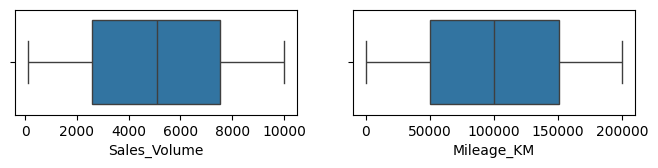

In [20]:
plt.figure(figsize=(8,3))
plt.subplot(2,2,1)
sns.boxplot(x='Sales_Volume', data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x='Mileage_KM', data=df)

plt.show()

In [10]:
q1 = df['Mileage_KM'].quantile(0.25)
q3 = df['Mileage_KM'].quantile(0.75)

iqr = q3 - q1

min_range = q1 - (iqr*1.5)
max_range = q3 + (iqr*1.5)

print(min_range, max_range)

-100500.375 301308.625


## Feature Scaling Technique

In [10]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [11]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume'], dtype='object')

In [12]:
mms = MinMaxScaler()
df[['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']] = mms.fit_transform(df[['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']])

In [13]:
df.head(2)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,0.571429,0.758752,0.763795,0.828367,High
1,i8,2013,North America,Red,Hybrid,Automatic,0.028571,0.608361,0.546890,0.336196,Low


In [14]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,0.499194,0.501539,0.500396,0.501820
std,4.324459,0.288308,0.289718,0.288876,0.288591
min,2010.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.257143,0.250884,0.249281,0.251339
50%,2017.000000,0.485714,0.501945,0.500139,0.503788
75%,2021.000000,0.742857,0.753163,0.751442,0.751313
max,2024.000000,1.000000,1.000000,1.000000,1.000000


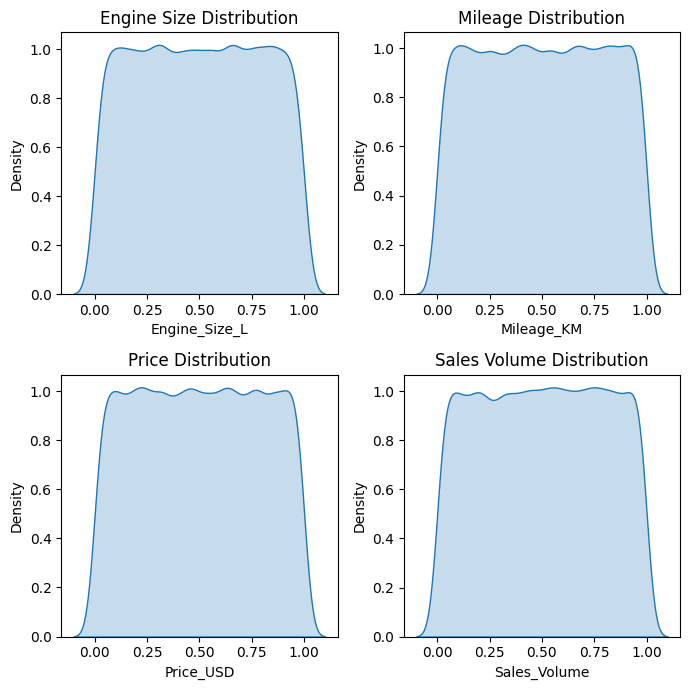

In [15]:
plt.figure(figsize=(7,7))

plt.subplot(2, 2, 1)
sns.kdeplot(df['Engine_Size_L'], fill=True)
plt.title('Engine Size Distribution')

plt.subplot(2, 2, 2)
sns.kdeplot(df['Mileage_KM'], fill=True)
plt.title('Mileage Distribution')

plt.subplot(2, 2, 3)
sns.kdeplot(df['Price_USD'], fill=True)
plt.title('Price Distribution')

plt.subplot(2, 2, 4)
sns.kdeplot(df['Sales_Volume'], fill=True)
plt.title('Sales Volume Distribution')

plt.tight_layout()
plt.show()